# Housing Prices 🏠🏡

In [1]:
# import libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [11]:
# load data
homedata_train = pd.read_csv('input/train.csv')
homedata_test = pd.read_csv('input/test.csv')

[Data Exploration]

In [3]:
homedata_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# data size
R_train, C_train = homedata_train.shape
R_test, C_test = homedata_test.shape
print('Training set : {} × {}'.format(R_train, C_train))
print('Validation set : {} × {}'.format(R_test, C_test))

Training set : 1460 × 81
Validation set : 1459 × 80


In [5]:
homedata_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

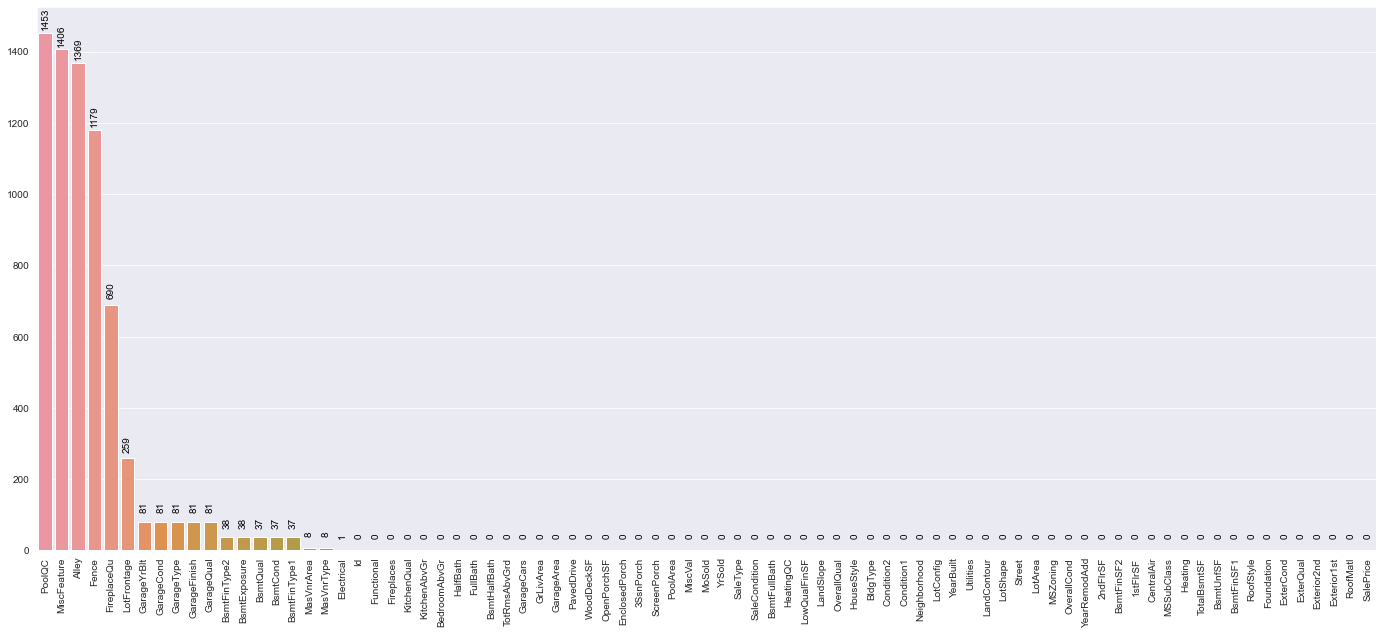

In [7]:
plt.figure(figsize=(24,10))
# colums with the most null values
cols_with_null = homedata_train.isnull().sum().sort_values(ascending=False)
# visualization
ax = sns.barplot(x=cols_with_null.index, y=cols_with_null)
for i in ax.patches:  # plot-annotation
    ax.annotate("%.0f" % i.get_height(), (i.get_x() + i.get_width() / 2., i.get_height() + 40),  ha='center', va='center',  fontsize=10, color='black', rotation=90)
plt.xticks(rotation=90) # X-axis index rotation
plt.show;

In [12]:
cols_to_drop=(cols_with_null.head(5).index).tolist() #drop 1-5th columns
homedata_train.drop(cols_to_drop,axis=1,inplace=True)
homedata_test.drop(cols_to_drop,axis=1,inplace=True)
R_train, C_train = homedata_train.shape
print('Training set(drop) : {} × {}'.format(R_train, C_train))

Training set(drop) : 1460 × 76
